### **Importing the libraries required for this project.**


In [1]:
# The Pandas library will be used for preprocessing and organizing text data into a data frame for further analysis.

import pandas as pd

In [2]:
# Numpy will be used for performing numerical computations on textual data converted into numerical vectors.

import numpy as np

In [3]:
# The string library is a built-in Python library used for string manipulation.

import string

In [4]:
# The re (regular expression) library is a built-in Python library used for pattern matching in strings.

import re

In [5]:
# NLTK (Natural Language Toolkit) is a Python library for natural language processing tasks. It provides tools and algorithms for preprocessing, feature extraction, and sentiment classification of text data.

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
# The TextBlob library used with the re library to preprocess text data and classify the sentiment of the text.

from textblob import TextBlob

In [7]:
# The collections library provides tools to count and store occurrences of words and phrases.

from collections import Counter

In [8]:
# Wordcloud will be used to create word clouds from text data.

from wordcloud import WordCloud

In [10]:
# Matplotlib will be used for data visualisation. 

import matplotlib.pyplot as plt

In [11]:
# Seaborn will be used for data visualisation. 

import seaborn as sns




---



### **Reading in the data**

In [14]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/chatgpt_tweets.csv")



---



### **Exploring the data**

In [15]:
# Viewing the first five rows of the dataset for a brief overview of the structure and composition of the DataFrame. 

df.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,country,photo_url,city,country_code
0,1598014056790622225,2022-11-30 18:00:15+00:00,2,0,0,0,ChatGPT: Optimizing Language Models for Dialog...,NaN,NaN,NaN,NaN
1,1598014522098208769,2022-11-30 18:02:06+00:00,12179,889,1130,3252,"Try talking with ChatGPT, our new AI system wh...",NaN,NaN,NaN,NaN
2,1598014741527527435,2022-11-30 18:02:58+00:00,2,0,0,1,ChatGPT: Optimizing Language Models for Dialog...,NaN,https://pbs.twimg.com/media/Fi1J8HbWAAMv_yi.jpg,NaN,NaN
3,1598015493666766849,2022-11-30 18:05:58+00:00,561,8,25,66,"THRILLED to share that ChatGPT, our new model ...",NaN,https://pbs.twimg.com/media/Fi1Km3WUYAAfzHS.jpg,NaN,NaN
4,1598015509420994561,2022-11-30 18:06:01+00:00,1,0,0,0,"As of 2 minutes ago, @OpenAI released their ne...",NaN,NaN,NaN,NaN


In [16]:
# Identifying the types of data in each column. 

df.dtypes

tweet_id          int64
created_at       object
like_count        int64
quote_count       int64
reply_count       int64
retweet_count     int64
tweet            object
country          object
photo_url        object
city             object
country_code     object
dtype: object

In [17]:
# A summary of the dataframe, including the number of non-null values and the data type of each column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   tweet_id       219294 non-null  int64 
 1   created_at     219294 non-null  object
 2   like_count     219294 non-null  int64 
 3   quote_count    219294 non-null  int64 
 4   reply_count    219294 non-null  int64 
 5   retweet_count  219294 non-null  int64 
 6   tweet          219294 non-null  object
 7   country        3648 non-null    object
 8   photo_url      68446 non-null   object
 9   city           3648 non-null    object
 10  country_code   3645 non-null    object
dtypes: int64(5), object(6)
memory usage: 18.4+ MB


In [18]:
# Calculating the percentage of missing values in each column, and printing the column name and percentage of missing values in that column.

for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, pct_missing))

tweet_id - 0.0%
created_at - 0.0%
like_count - 0.0%
quote_count - 0.0%
reply_count - 0.0%
retweet_count - 0.0%
tweet - 0.0%
country - 0.9833647979424882%
photo_url - 0.6878801973606209%
city - 0.9833647979424882%
country_code - 0.9833784782073381%


In [23]:
# Returns the sum of missing values in each column of the dataframe.

df.isnull().sum()


tweet_id              0
created_at            0
like_count            0
quote_count           0
reply_count           0
retweet_count         0
tweet                 0
country          215646
photo_url        150848
city             215646
country_code     215649
dtype: int64



---



### **Data manipulation**

In [27]:
# Making a copy of the dataframe for further exploration and data manipulation. 

df_new=df.copy()

In [28]:
# Dropping the columns 'country', 'photo_url', 'city', and 'country_code' from the dataframe using the drop() method.

df_new = df.drop(['country', 'photo_url', 'city', 'country_code'], axis=1)


In [29]:
df_new.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet
0,1598014056790622225,2022-11-30 18:00:15+00:00,2,0,0,0,ChatGPT: Optimizing Language Models for Dialog...
1,1598014522098208769,2022-11-30 18:02:06+00:00,12179,889,1130,3252,"Try talking with ChatGPT, our new AI system wh..."
2,1598014741527527435,2022-11-30 18:02:58+00:00,2,0,0,1,ChatGPT: Optimizing Language Models for Dialog...
3,1598015493666766849,2022-11-30 18:05:58+00:00,561,8,25,66,"THRILLED to share that ChatGPT, our new model ..."
4,1598015509420994561,2022-11-30 18:06:01+00:00,1,0,0,0,"As of 2 minutes ago, @OpenAI released their ne..."


In [30]:
# Calculating the number of words in each tweet and adding a new column for 'word count' to the dataframe.

def number_of_words(df_new):
    df_new['word_count'] = df_new['tweet'].apply(lambda x : len(str(x).split(" ")))

In [31]:
# Calculating the total number of characters in each tweet (excluding spaces, punctuation marks, and other special characters).

def char_count(text):
    charc = 0
    for char in text:
        if char != " ":
            charc += 1
    return charc

In [32]:
# Adding a new column 'stopwords_count' to the data frame that counts the number of stop words in each row of the 'tweet' column.

stop_words = stopwords.words('english')
def num_of_stopwords(df_new):
    df_new['stopwords_count'] = df_new['tweet'].apply(lambda x: len([x for x in x.split() if x in stop_words]))

In [33]:
# Adding a new column 'hashtag_count' to the data frame that counts the number of hashtags in each row of the 'tweet' column.

def num_of_hashtags(df_new):
    df_new['hashtag_count'] = df_new['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
  

In [34]:
# Defining a function 'feat_extract' that adds four new columns to the data frame using the functions 'num_of_hashtags', 'number_of_words', 'char_count', and 'num_of_stopwords'.

def feat_extract(df_new):
    num_of_hashtags(df_new)
    number_of_words(df_new)
    df_new['char_count']=df_new['tweet'].apply(char_count)
    num_of_stopwords(df_new)



---



### **Text preprocessing**

In [35]:
# Defining a function called 'remove_emoji' that takes a string as input and uses a regular expression to remove any Unicode characters that match specific ranges. 

def remove_emoji(string):
        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # Emoticons
                           u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                           u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                           u"\U0001F1E0-\U0001F1FF"  # Regional Indicator Symbols
                           u"\U00002702-\U000027B0"  # Miscellaneous Symbols and Arrows
                           u"\U000024C2-\U0001F251"  # Enclosed Characters
                           "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', string) 

In [36]:
# Defining a function called 'remove_apostrophe' function which uses a regular expression to remove apostrophes from a string. 

def remove_apostrophe(string):
    apostrophe_pattern = re.compile(r"[’‘]")  # Matches apostrophes
    return apostrophe_pattern.sub('', string)

In [42]:
# The 'hyperlinks' function removes hyperlinks and various HTML tags from a string.

def hyperlinks(text):
    temp = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.',text)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('&gt;', "", temp) 
    temp = re.sub('&#x27;', "'", temp) 
    temp = re.sub('&#x2F;', ' ', temp)
    temp = re.sub('<p>', ' ', temp) 
    temp = re.sub('<i>', ' ', temp)
    temp = re.sub('</i>', '', temp) 
    temp = re.sub('&#62;', '', temp)
    temp = re.sub("\n", '', temp)
    return temp

In [37]:
# This 'clean_tweet' function takes a tweet text as input and performs several cleaning tasks to preprocess the text.

def clean_tweet(tweet):
    temp=tweet.lower() # Converts the tweet text to lowercase.
    temp = re.sub("'", "", temp) # Avoids removing contractions in English.
    temp = re.sub("@[A-Za-z0-9_]+","", temp) # Removes apostrophes and mentions (e.g., "@username").
    temp = re.sub("chatgpt","",temp) # Removes the word "chatgpt".
    temp = re.sub(r'http\S+', '', temp) # Removes hyperlinks.
    temp = re.sub('[()!?]', ' ', temp) # Replaces all parentheses, exclamation marks, and question marks with a space.
    temp = re.sub('\[.*?\]',' ', temp) # Removes square brackets (i.e., removes text that is inside square brackets).
    punc=string.punctuation # Removes punctuation marks. 
    temp=temp.translate(str.maketrans('','',punc)) #Removes all the punctuation marks from the given string 'temp'.
    
    #Removing stopwords.
    new_list=[]
    words=word_tokenize(temp)
    sws=stopwords.words('english')
    for word in words:
        if word not in sws:
            new_list.append(word)
    
    temp=' '.join(new_list)
    return temp

In [38]:
# Using the TextBlob library to correct any spelling errors in the dataset.

def spell_correct(df2):
    df2['tweet'].apply(lambda x: str(TextBlob(x).correct()))



---



### **Lemmatization**

In [39]:
# This 'lemmatize' function tokenizes the text and lemmatizes each word using the WordNetLemmatizer from the nltk library, and then joins the resulting list of lemmatized words back into a string.

def lemmatize(text):    
    new_list=[]
    lemma=WordNetLemmatizer()
    words=word_tokenize(text)
    for word in words:
        new_list.append(lemma.lemmatize(word))
    
    return ' '.join(new_list)



---



### **Pre-processing data for feature extraction**

In [43]:
#Applying a series of text pre-processing steps to the dataframe.

feat_extract(df_new)

df_new['tweet'] = df_new['tweet'].apply(hyperlinks)
df_new['tweet'] = df_new['tweet'].apply(remove_emoji)
df_new['tweet'] = df_new['tweet'].apply(remove_apostrophe)
df_new['tweet'] = df_new['tweet'].apply(clean_tweet)
df_new['final_tweet'] = df_new['tweet'].apply(lemmatize)

In [44]:
df_new.head()


,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,hashtag_count,word_count,char_count,stopwords_count,final_tweet
0,1598014056790622225,2022-11-30 18:00:15+00:00,2,0,0,0,optimizing language models dialogue,0,8,73,1,optimizing language model dialogue
1,1598014522098208769,2022-11-30 18:02:06+00:00,12179,889,1130,3252,try talking new ai system optimized dialogue f...,0,21,119,6,try talking new ai system optimized dialogue f...
2,1598014741527527435,2022-11-30 18:02:58+00:00,2,0,0,1,optimizing language models dialogue ai machine...,4,26,239,3,optimizing language model dialogue ai machinel...
3,1598015493666766849,2022-11-30 18:05:58+00:00,561,8,25,66,thrilled share new model optimized dialog publ...,0,22,167,8,thrilled share new model optimized dialog publ...
4,1598015509420994561,2022-11-30 18:06:01+00:00,1,0,0,0,2 minutes ago released new nnand use right,0,20,120,6,2 minute ago released new nnand use right




---



### **Sentiment Analysis**

In [45]:
# Initialises an instance of the SentimentIntensityAnalyzer class from the NLTK library.

sid=SentimentIntensityAnalyzer()

In [46]:
#Using the SentimentIntensityAnalyzer from the NLTK library to calculate the compound polarity score, neutrality score, negativity score, and positivity score for each tweet in the 'final_tweet' column.

df_new['sentiment_compound_polarity']=df_new.final_tweet.apply(lambda x:sid.polarity_scores(x)['compound'])
df_new['sentiment_neutral']=df_new.final_tweet.apply(lambda x:sid.polarity_scores(x)['neu'])
df_new['sentiment_negative']=df_new.final_tweet.apply(lambda x:sid.polarity_scores(x)['neg'])
df_new['sentiment_pos']=df_new.final_tweet.apply(lambda x:sid.polarity_scores(x)['pos'])
df_new['sentiment_type']=''

df_new.loc[df_new.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
df_new.loc[df_new.sentiment_compound_polarity==0,'sentiment_type']='NEUTRAL'
df_new.loc[df_new.sentiment_compound_polarity<0,'sentiment_type']='NEGATIVE'
df_new.head()

,tweet_id,created_at,like_count,quote_count,reply_count,retweet_count,tweet,hashtag_count,word_count,char_count,stopwords_count,final_tweet,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type
0,1598014056790622225,2022-11-30 18:00:15+00:00,2,0,0,0,optimizing language models dialogue,0,8,73,1,optimizing language model dialogue,0.4588,0.500,0.0,0.500,POSITIVE
1,1598014522098208769,2022-11-30 18:02:06+00:00,12179,889,1130,3252,try talking new ai system optimized dialogue f...,0,21,119,6,try talking new ai system optimized dialogue f...,0.8225,0.449,0.0,0.551,POSITIVE
2,1598014741527527435,2022-11-30 18:02:58+00:00,2,0,0,1,optimizing language models dialogue ai machine...,4,26,239,3,optimizing language model dialogue ai machinel...,0.4588,0.857,0.0,0.143,POSITIVE
3,1598015493666766849,2022-11-30 18:05:58+00:00,561,8,25,66,thrilled share new model optimized dialog publ...,0,22,167,8,thrilled share new model optimized dialog publ...,0.8860,0.345,0.0,0.655,POSITIVE
4,1598015509420994561,2022-11-30 18:06:01+00:00,1,0,0,0,2 minutes ago released new nnand use right,0,20,120,6,2 minute ago released new nnand use right,0.0000,1.000,0.0,0.000,NEUTRAL




---



### **Sentiment: Bar Chart**



<Axes: ylabel='sentiment_type'>

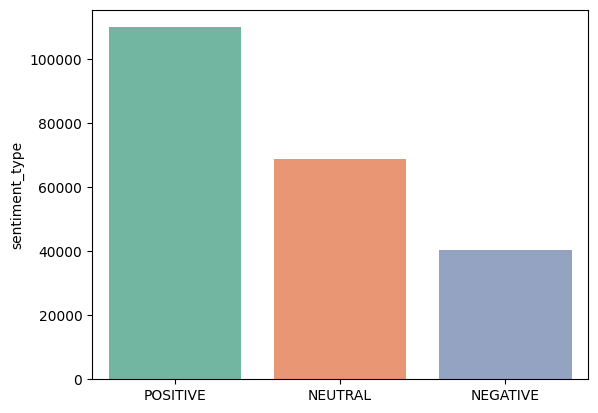

In [48]:
sns.barplot(data=df_new,x=df_new['sentiment_type'].value_counts().index,y=df_new['sentiment_type'].value_counts(),palette='Set2')





---



### **Sentiment: Pie Chart**

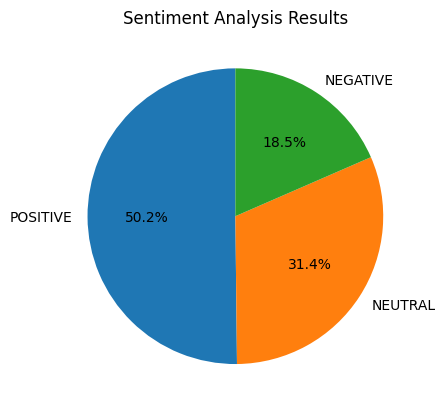

In [49]:
import matplotlib.pyplot as plt
counts = df_new['sentiment_type'].value_counts()
fig, ax = plt.subplots()
ax.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Sentiment Analysis Results')
plt.show()



---



### **Word Cloud: Positive Tweets**

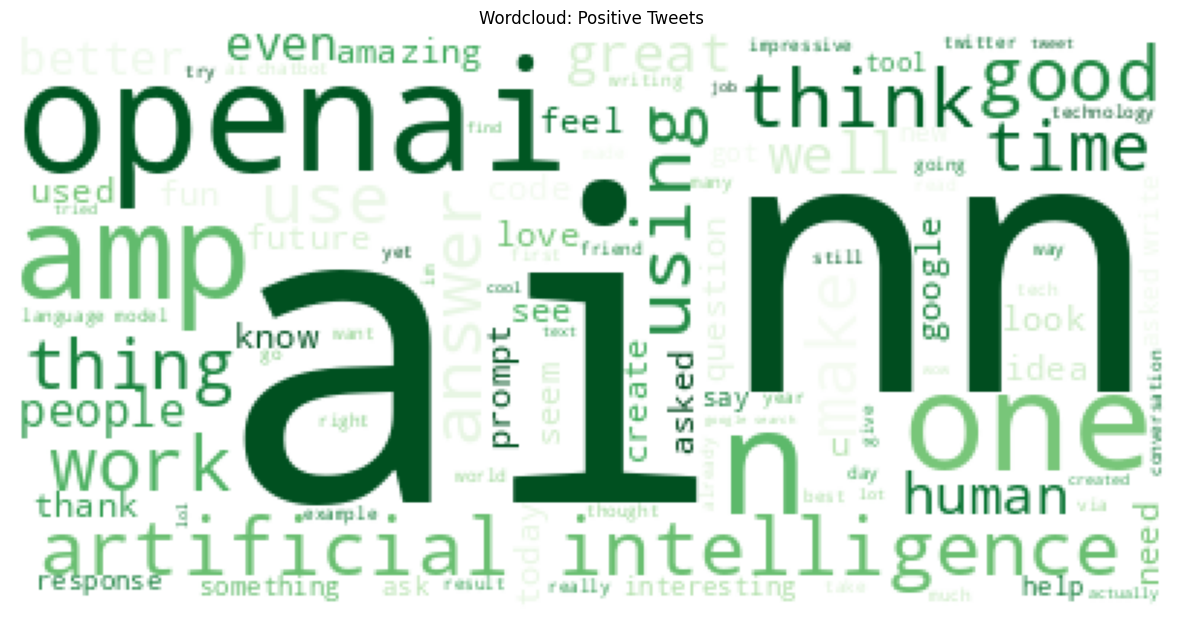

In [52]:
# Creating a new data frame that shows the 30 most common words in the 'final_tweet' column of 'eda'. 

eda=df_new.copy()

eda['temp_list'] = eda['final_tweet'].apply(lambda x:str(x).split())
top = Counter([item for sublist in eda['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(30))
temp.columns = ['Common_words','count']

# Creating the word cloud using text from positive-sentiment tweets.

plt.figure(figsize=(15,10))
text=' '.join(eda[eda['sentiment_type']=='POSITIVE']['final_tweet'])
wordcloud=WordCloud(max_words=100, background_color='white', colormap='Greens').generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordcloud: Positive Tweets')
plt.show()



---



### **Word Cloud: Negative Tweets**

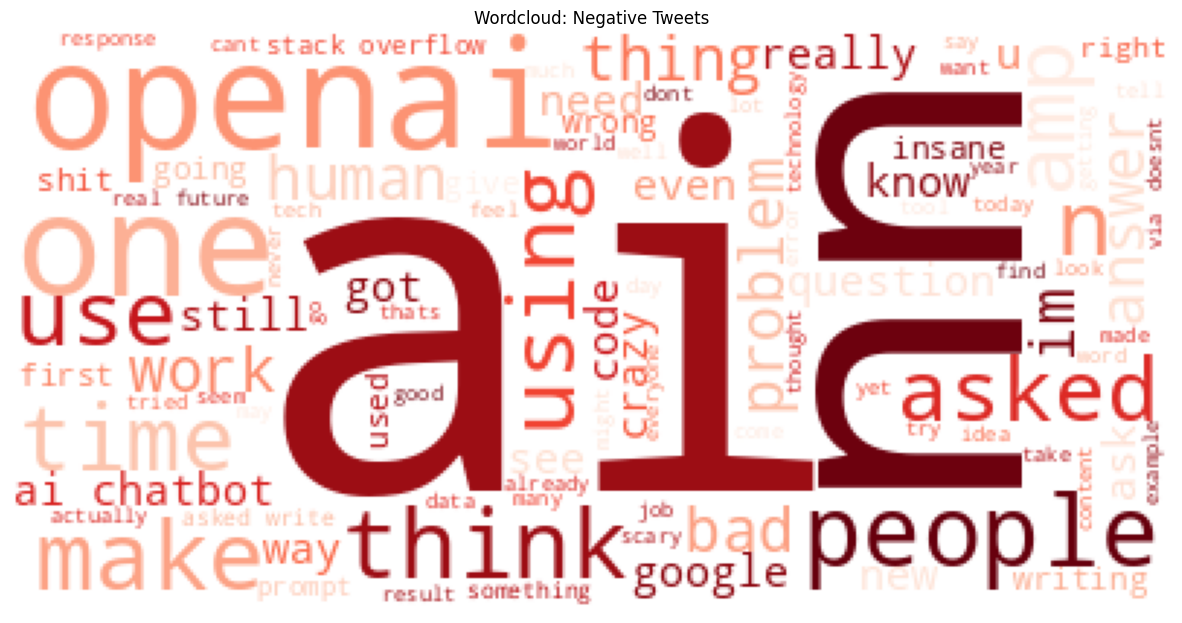

In [53]:
# Creating the word cloud using text from negative-sentiment tweets.

plt.figure(figsize=(15,10))
text=' '.join(eda[eda['sentiment_type']=='NEGATIVE']['final_tweet'])
wordcloud=WordCloud(max_words=100,background_color='white',colormap='Reds').generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Wordcloud: Negative Tweets')
plt.show()



---



### **Topic Analysis: Use-cases**




In [54]:
# Defining and labelling the keyword groups for analysis. 
keyword_groups = {'Programming': ['python', 'programming', 'coding', 'code', 'syntax', 'debug', 'debugging', 'markdown', 'error-check', 'shinyapps', 'react', 'ruby on rails'],
                  'Writing': ['writing', 'essay', 'assignment', 'write', 'stories', 'story', 'post', 'blog', 'article'],
                  'Communication': ['text', 'message', 'email', 'letter', 'memo', 'meeting'],
                  'Research': ['research', 'search', 'wiki', 'wikipedia', 'paper', 'dissertation', 'thesis'],
                  'Creativity': ['idea', 'ideas', 'poem', 'haiku', 'song', 'episode', 'rhyme', 'lyrics', 'art', 'portrait', 'rap'],
                  'Education': ['exam', 'assignment', 'essay', 'tutor', 'homework', 'undergraduate', 'student', 'teacher', 'quiz', 'papers']}

# Creating a dictionary to store the count of tweets for each group.
group_counts = {}

# Looping over the keyword groups and count the number of tweets that contain any keyword in the group.
for group_label, group_keywords in keyword_groups.items():
    mask = df['tweet'].str.contains('|'.join(group_keywords), case=False)
    group_counts[group_label] = mask.sum()

# Calculating the total number of tweets in the dataset.
total_tweets = len(df)

# Looping over the keyword groups and calculate the percentage of tweets that contain any keyword in the group.
for group_label, group_count in group_counts.items():
    group_percentage = group_count / total_tweets * 100
    print(f'The "{group_label}" group appears in {group_percentage:.2f}% of the tweets.')

The "Programming" group appears in 7.20% of the tweets.
The "Writing" group appears in 16.40% of the tweets.
The "Communication" group appears in 4.23% of the tweets.
The "Research" group appears in 5.01% of the tweets.
The "Creativity" group appears in 17.37% of the tweets.
The "Education" group appears in 5.60% of the tweets.




---



### **Topic Analysis: Use-cases > Bar chart**

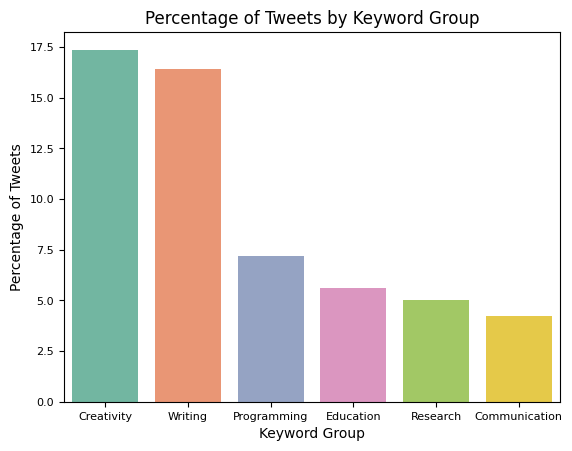

In [55]:
# Creating a list of the percentage of tweets that contain each keyword group.
group_percentages = [(group_label, group_count / total_tweets * 100) for group_label, group_count in group_counts.items()]

# Sorting the list by percentage in descending order.
group_percentages.sort(key=lambda x: x[1], reverse=True)

# Extracting the group labels and percentages into separate lists.
group_labels = [x[0] for x in group_percentages]
group_percentages = [x[1] for x in group_percentages]

# Creating a bar chart of the group percentages.
sns.barplot(x=group_labels, y=group_percentages, palette='Set2')
plt.title('Percentage of Tweets by Keyword Group', fontsize=12)
plt.xlabel('Keyword Group', fontsize=10)
plt.ylabel('Percentage of Tweets', fontsize=10)
plt.xticks(fontsize=8) #change x-axis tick label size
plt.yticks(fontsize=8) #change y-axis tick label size
plt.show()



---



### **Topic Analysis: Common issues**

In [56]:
# Defining and labelling the keyword groups for analysis. 
keyword_groups = {'Hallucinations': ['hallucination', 'hallucinate', 'unfactual', 'incorrect', 'inaccurate', 'unverified'],
                  'Ethical implications': ['ethics', 'bias', 'ethical', 'plagiarism', 'copyright'],
                  'Disinformation': ['disinformation', 'misinformation', 'libel', 'slander', 'propaganda'],
                  'Abusive Language': ['racism', 'racist', 'misogyny', 'sexism', 'sexist', 'hate speech', 'abusive language', 'anti-semitism']}

# Creating a dictionary to store the count of tweets for each group.
group_counts = {}

# Looping over the keyword groups and counting the number of tweets that contain any keyword in the group.
for group_label, group_keywords in keyword_groups.items():
    mask = df['tweet'].str.contains('|'.join(group_keywords), case=False)
    group_counts[group_label] = mask.sum()

# Calculating the total number of tweets in the dataset.
total_tweets = len(df)

# Looping over the keyword groups and calculate the percentage of tweets that contain any keyword in the group.
for group_label, group_count in group_counts.items():
    group_percentage = group_count / total_tweets * 100
    print(f'The "{group_label}" group appears in {group_percentage:.2f}% of the tweets.')

The "Hallucinations" group appears in 0.43% of the tweets.
The "Ethical implications" group appears in 1.25% of the tweets.
The "Disinformation" group appears in 0.23% of the tweets.
The "Abusive Language" group appears in 0.13% of the tweets.




---



### **Topic Analysis: Common issues > Bar chart**

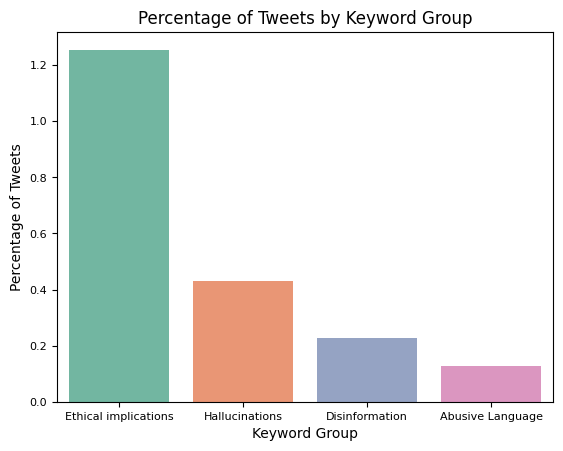

In [57]:
# Creating a list of the percentage of tweets that contain each keyword group.
group_percentages = [(group_label, group_count / total_tweets * 100) for group_label, group_count in group_counts.items()]

# Sorting the list by percentage in descending order.
group_percentages.sort(key=lambda x: x[1], reverse=True)

# Extracting the group labels and percentages into separate lists.
group_labels = [x[0] for x in group_percentages]
group_percentages = [x[1] for x in group_percentages]

# Creating a bar chart of the group percentages.
sns.barplot(x=group_labels, y=group_percentages, palette='Set2')
plt.title('Percentage of Tweets by Keyword Group', fontsize=12)
plt.xlabel('Keyword Group', fontsize=10)
plt.ylabel('Percentage of Tweets', fontsize=10)
plt.xticks(fontsize=8) #change x-axis tick label size
plt.yticks(fontsize=8) #change y-axis tick label size
plt.show()



---

